# Predicting Doctor Prescriptions of Pharmaceutical Drugs
- Medical representatives serve as the crucial link between pharmaceutical and medical companies and healthcare professionals, responsible for promoting and selling products such as pharmaceutical drugs and medical equipment. Their primary challenge is persuading healthcare providers, such as doctors, nurses, and pharmacists, to choose their company’s products over those of competitors, particularly when multiple companies offer drugs with the same active ingredients.
- This project aims to determine whether a doctor, based on certain features, will prescribe one of six drugs from a local pharmaceutical company that produces generic versions of multinational drugs. By analyzing specific patterns and features in prescribing behavior, the project seeks to enhance the effectiveness of medical representatives in promoting their company’s products and navigating the highly competitive pharmaceutical market.


## Data Collection and Exploration
Collect data from the SQL database (medicine_table and doctor_table), and perform initial exploration to understand the distribution of features like doctor specialties, drug prices, area, and prescription behavior.

In [1]:
# Import necessary libraries
import pandas as pd     
import seaborn as sns      
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# Install ipython-sql if you haven't already (comment if you have it)
!pip install ipython-sql

# Load the ipython-sql extension
%load_ext sql

# Connect to the SQLite database
%sql sqlite:///med.db

In [3]:
# List all tables in the database
%sql SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///med.db
Done.


name
medicine_table
doctor_table


In [4]:
# Get the structure of the 'medicine_table'
%sql PRAGMA table_info(medicine_table);

 * sqlite:///med.db
Done.


cid,name,type,notnull,dflt_value,pk
0,id_m,INTEGER,0,None,0
1,medicine,TEXT,0,None,0
2,price,INTEGER,0,None,0


In [5]:
# Get the structure of the 'doctor_table'
%sql PRAGMA table_info(doctor_table); 

 * sqlite:///med.db
Done.


cid,name,type,notnull,dflt_value,pk
0,id_dr,INTEGER,0,None,0
1,area,TEXT,0,None,0
2,speciality,TEXT,0,None,0
3,dr_class,TEXT,0,None,0
4,exam_price,INTEGER,0,None,0
5,clinic_hos,TEXT,0,None,0
6,write,INTEGER,0,None,0


In [6]:
# Use the %sql magic to perform the join between 2 tables across the id column
%sql SELECT * FROM medicine_table AS m JOIN doctor_table AS d ON m.id_m = d.id_dr;

 * sqlite:///med.db
Done.


id_m,medicine,price,id_dr,area,speciality,dr_class,exam_price,clinic_hos,write
1,type1,45,1,area1,chest,a,200,clinic,1
2,type4,36,2,area2,im,b,100,clinic,1
3,type1,45,3,area8,chest,a,75,hospital,1
4,type1,45,4,area5,chest,a,30,hospital,1
5,type5,29,5,area6,uro,a,220,clinic,0
6,type5,29,6,area8,im,b,140,clinic,1
7,type6,20,7,area2,im,b,70,hospital,1
8,type4,36,8,area8,chest,a,75,hospital,0
9,type2,30,9,area3,cd,b,150,clinic,1
10,type2,30,10,area1,neuro,b,150,clinic,1


In [7]:
# Load the result into a DataFrame using the %sql magic
result = %sql SELECT * FROM medicine_table AS m JOIN doctor_table AS d ON m.id_m = d.id_dr;

# Convert the result to a Pandas DataFrame
df = result.DataFrame()

# Display the combined DataFramedf.head()

 * sqlite:///med.db
Done.


In [8]:
df.drop(columns="id_m",inplace=True)
df.head()

,medicine,price,id_dr,area,speciality,dr_class,exam_price,clinic_hos,write
0,type1,45,1,area1,chest,a,200,clinic,1
1,type4,36,2,area2,im,b,100,clinic,1
2,type1,45,3,area8,chest,a,75,hospital,1
3,type1,45,4,area5,chest,a,30,hospital,1
4,type5,29,5,area6,uro,a,220,clinic,0


In [9]:
# save the dataset as csv file for any further use
df.to_csv('data.csv', index=False)

## let's explore the data

In [10]:
# The dataset contains 390 rows and 9 columns, which will be further interpreted in the analysis
print("Dataset dimensions (rows, columns):", df.shape)
print("Columns in the dataset:", df.columns.tolist())

Dataset dimensions (rows, columns): (390, 9)
Columns in the dataset: ['medicine', 'price', 'id_dr', 'area', 'speciality', 'dr_class', 'exam_price', 'clinic_hos', 'write']


In [11]:
# Import necessary libraries
import pandas as pd

# Assuming 'df' is your DataFrame
# Loop through each column in the DataFrame and display unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    print(f"Count of unique values: {len(unique_values)}\n")


Unique values in 'medicine': ['type1' 'type4' 'type5' 'type6' 'type2' 'type3']
Count of unique values: 6

Unique values in 'price': [45 36 29 20 30 24]
Count of unique values: 6

Unique values in 'id_dr': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 

### Overview of dataset's columns
The dataset consists 9 columns:

   - **medicine**: The commercial names of the medicines categorized as type1 to type6.
   - **price**: The price associated with each of the six medicines (20:45).
   - **id_dr**: A total of 390 unique doctors are represented in the dataset.
   - **exam_price**: The examination fee charged by each doctor.
   - **clinic_hos**: Classification indicating whether the doctor works in a 'clinic' or a 'hospital'.
   - **dr_class**: Classification of doctors based on their patient rates:
     - **Class A**: Doctors with a high patient rate.
     - **Class B**: Doctors with a medium patient rate.
   - **area**: Each medical representative covers specific areas designated as area1 to area8, totaling eight areas for medical visits.
   - **specialty**: The medical specialties of doctors, crucial for determining the appropriate medicines for prescriptions. The specialties represented include:
     - Chest (chest specialist)
     - IM (internal medicine specialist)
     - CD (cardiology specialist)
     - Neuro (neurology specialist)
     - GIT (gastrointestinal tract specialist)
     - ENT (ear, nose, and throat specialist)
     - Sur (surgery specialist)
     - Uro (urology specialist)
     - GP (general practitioner)
     - Or (orthopedic specialist)
     - Vas (vascular specialist)
   - **Prescription Writing**: The dataset indicates whether doctors write prescriptions for the listed medicines, represented as binary values (0 or 1).

In [12]:
# summary statistics
df.describe(include="object")

,medicine,area,speciality,dr_class,clinic_hos
count,390,390,390,390,390
unique,6,8,11,2,2
top,type1,area2,im,b,hospital
freq,157,80,146,224,197


In [13]:
# summary statistics
df.describe()

,price,id_dr,exam_price,write
count,390.000000,390.000000,390.000000,390.000000
mean,35.715385,195.500000,121.205128,0.587179
std,8.751263,112.727548,86.729844,0.492974
min,20.000000,1.000000,30.000000,0.000000
25%,29.000000,98.250000,50.000000,0.000000
50%,36.000000,195.500000,80.000000,1.000000
75%,45.000000,292.750000,170.000000,1.000000
max,45.000000,390.000000,350.000000,1.000000


### Summary Statistics Interpretation

- **Price**: 
  - Average price: **35.72** (range: **20** to **45**). Prices vary moderately (std: **8.75**) with no extreme values.

- **Examination Price (`exam_price`)**: 
  - Average exam price: **121.21** (range: **30** to **350**), with significant variation (std: **86.73**).

- **Prescription Writing (`write`)**: 
  - Average writing rate: **59%** of doctors prescribe medicines. Most doctors (at least 50%) write prescriptions, with a binary outcome (0 or 1).
  
- **Medicine**: 
  - Total unique medicines: **6**. The most frequently prescribed medicine is **type1** (frequency: **157**).

- **Area**: 
  - Total unique areas: **8**. The most common area is **area2** (frequency: **80**).

- **Speciality**: 
  - Total unique specialities: **11**. The most represented speciality is **Internal Medicine (IM)** (frequency: **146**).

- **Doctor Class (`dr_class`)**: 
  - Total unique classes: **2**. The most common class is **Class B** (frequency: **224**).

- **Clinic/Hospital (`clinic_hos`)**: 
  - Total unique classifications: **2**. The most prevalent classification is **hospital** (frequency: **197**).


In [14]:
# we will relize that
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   medicine    390 non-null    object
 1   price       390 non-null    int64 
 2   id_dr       390 non-null    int64 
 3   area        390 non-null    object
 4   speciality  390 non-null    object
 5   dr_class    390 non-null    object
 6   exam_price  390 non-null    int64 
 7   clinic_hos  390 non-null    object
 8   write       390 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 27.6+ KB


### Data Types
- **int64**: 4 columns [ **price**, **id_dr**, **exam_price**, **write**]
  
- **object**: 5 columns [ **medicine**, **area**, **speciality** , **dr_class**, **clinic_hos**]

## Data Cleaning

### Missing values

In [15]:
# All columns have a non-null count of "390", indicating that the dataset is clean and free from "missing values".
# ensure there are no missing values
df.isnull().sum().sum()

0

### Check the duplications

In [16]:
print("Total duplicates found:", df.duplicated().sum())

Total duplicates found: 0


### Outlier Detection

Columns to Focus On for Outlier Detection :
- price: Analyze and detect outliers based on the price of medicines.
- exam_price: Analyze and detect outliers based on the examination prices charged by doctors

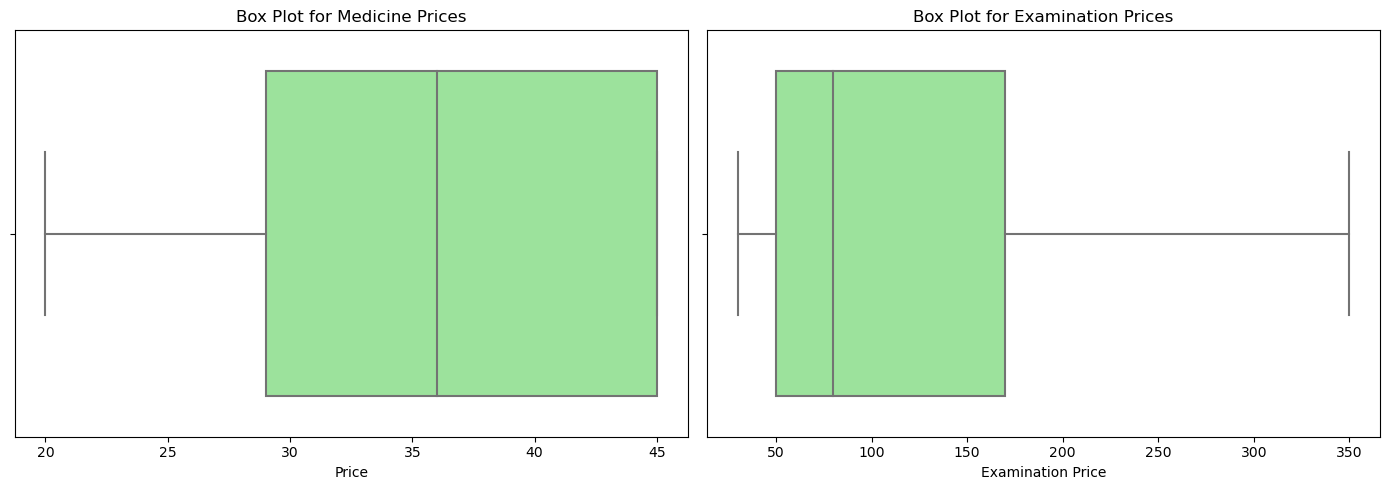

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots side by side
plt.figure(figsize=(14, 5))

# Box plot for price
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
sns.boxplot(x=df['price'], color='lightgreen')
plt.title('Box Plot for Medicine Prices')
plt.xlabel('Price')

# Box plot for exam_price
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
sns.boxplot(x=df['exam_price'], color='lightgreen')
plt.title('Box Plot for Examination Prices')
plt.xlabel('Examination Price')

# Show the plots
plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()


### interpret the box plots
**Price**
- this box plot indicates that the prices of medicine are fairly consistent, with a median around 35 and a range from 20 to 45, without any extreme outliers.

**Examination Price**
- The width of the box indicates the variability in examination prices but overall, this box plot indicates that examination prices have a median around 100, with a range from 50 to 200, and show some variability but no extreme outliers. This suggests a consistent pricing structure for examinations within this dataset

**another way to see the distibutions of Price and Exam price by 'Histogram'**

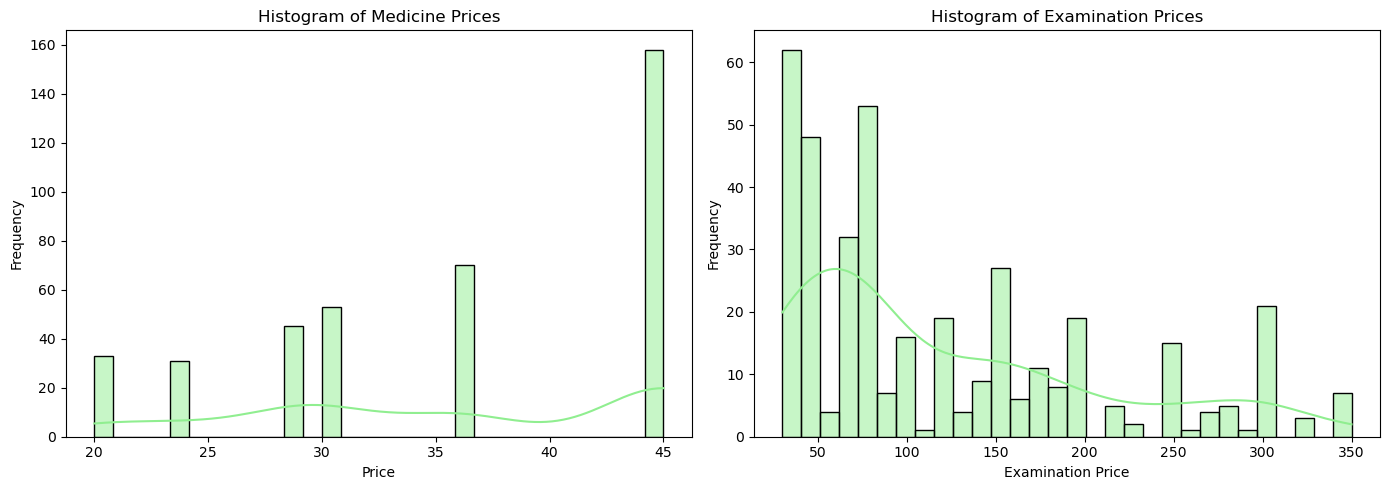

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots side by side
plt.figure(figsize=(14, 5))

# Histogram for price
plt.subplot(1, 2, 1)  
sns.histplot(df['price'], bins=30, kde=True, color='lightgreen')
plt.title('Histogram of Medicine Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for exam_price
plt.subplot(1, 2, 2) 
sns.histplot(df['exam_price'], bins=30, kde=True, color='lightgreen')
plt.title('Histogram of Examination Prices')
plt.xlabel('Examination Price')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout() 
plt.show()

## Log transformation (Handling The Skewness)

In [19]:
numeric_cols=df.select_dtypes(include="int64")
skewness = numeric_cols.skew()
skewness

price        -0.289120
id_dr         0.000000
exam_price    0.971409
write        -0.355511
dtype: float64

In [20]:
skew_cols = skewness[abs(skewness) > 0.5].index
skew_cols

Index(['exam_price'], dtype='object')

skewness pf exam price column after log_transformation is : 0.018563820023376212


Text(0, 0.5, 'Frequency')

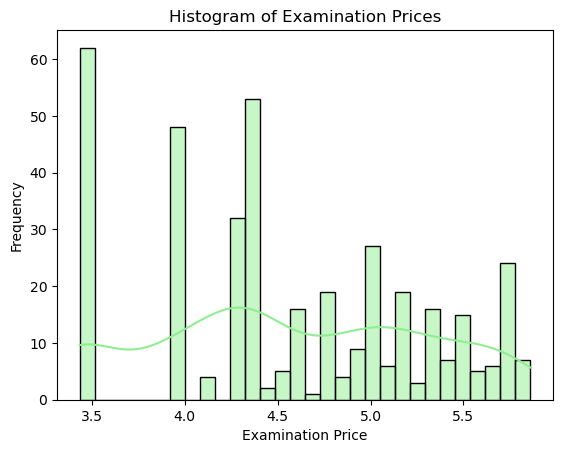

In [21]:
# Apply log1p transformation to skewed columns (exam_price)
df[skew_cols] = df[skew_cols].apply(np.log1p)

print("skewness pf exam price column after log_transformation is :", df['exam_price'].skew())
# Histogram for exam_price after log transformation
sns.histplot(df['exam_price'], bins=30, kde=True, color='lightgreen')
plt.title('Histogram of Examination Prices')
plt.xlabel('Examination Price')
plt.ylabel('Frequency')

In [22]:
df.info() # notice after applying a logarithmic transformation, the exam_price dtype now is float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   medicine    390 non-null    object 
 1   price       390 non-null    int64  
 2   id_dr       390 non-null    int64  
 3   area        390 non-null    object 
 4   speciality  390 non-null    object 
 5   dr_class    390 non-null    object 
 6   exam_price  390 non-null    float64
 7   clinic_hos  390 non-null    object 
 8   write       390 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 27.6+ KB


## analysis 

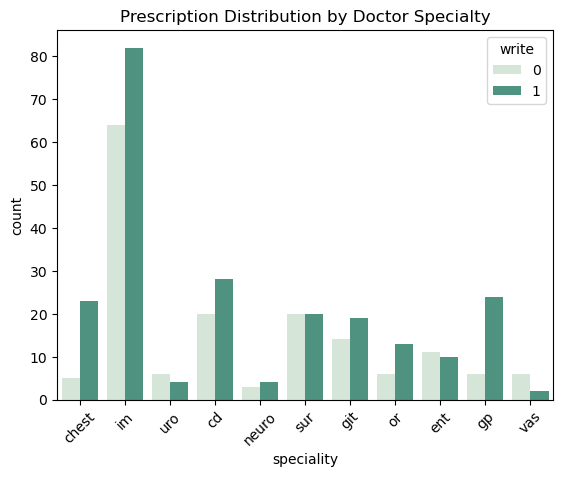

In [23]:
# Prescription Distribution by Doctor Specialty
sns.countplot(x='speciality', hue='write', data=df, palette=['#D2E8D5', '#449D85'] )
plt.title('Prescription Distribution by Doctor Specialty')
plt.xticks(rotation=45)
plt.show()

### interpret the results

- **Highest Distribution Specialties**: 

    - Internal Medicine **(IM)** has the highest prescription distribution in the data. From the histogram, approximately 80 doctors write prescriptions, while around 60 doctors do not.
        - Recommendation: Focus on this specialty, as it has a large proportion of doctors who write prescriptions. However, note that a significant portion of IM doctors do not write prescriptions, so further investigation is needed to understand why this is the case.

    - also  Cardiology **(CD)** , General Practitioners **(GP)** and **Chest** specialists show a high proportion of doctors who write prescriptions,(chest and gp) almost all doctors write prescriptions. This represents a potential opportunity for increased engagement with this groups.
        - Recommendation: These specialties are promising areas for the company to target, as doctors in these fields are likely to prescribe the medications.
    

- **Low Distribution Specialties**:
    - Urology (Uro), Neurology (Neuro), and Vascular (Vas): These specialties have the lowest prescription distributions, indicating fewer interactions or lower market penetration. 
        - Recommendation :The company might need to enhance efforts to engage these doctors to understand their needs and concerns.

### Heatmap Visualization of Prescription Distribution of 'im' speciality by Area

speciality  im
area          
area8       34
area6       24
area2       21
area5       20
area1       18
area3       10
area4       10
area7        9


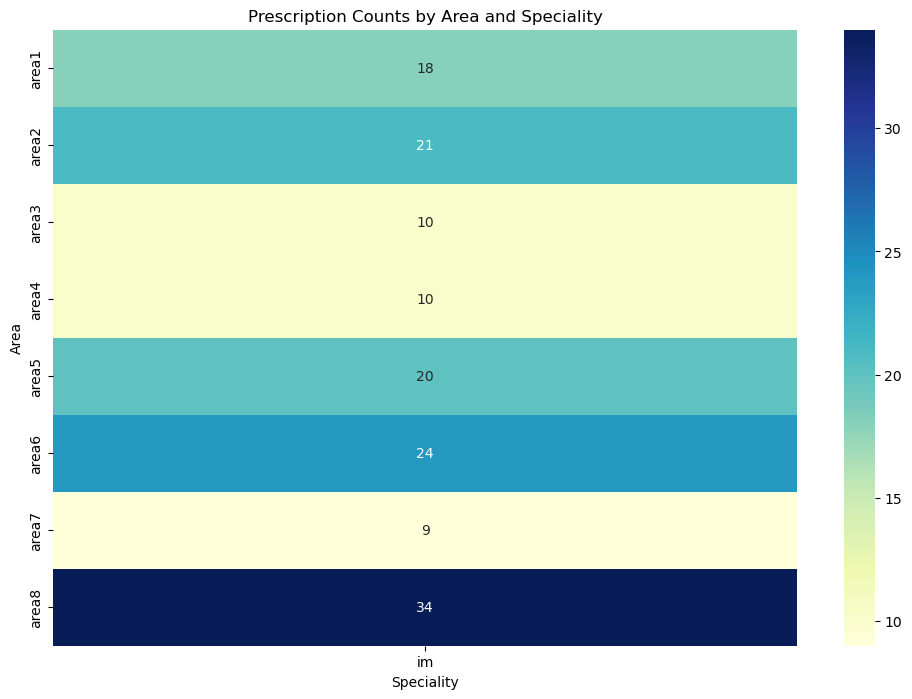

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Filter the data for Internal Medicine speciality
im_data = df[df['speciality'] == 'im']  

# First, group by both 'area' and 'speciality' and count the prescriptions
im_area_speciality_distribution = im_data.groupby(['area', 'speciality']).size().reset_index(name='prescription_count')

# Now pivot the DataFrame
im_area_heatmap_data = im_area_speciality_distribution.pivot(index='area', columns='speciality', values='prescription_count')

# Check the pivoted DataFrame
print(im_area_heatmap_data.sort_values(by="im",ascending=False))

import matplotlib.pyplot as plt
import seaborn as sns

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(im_area_heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')

plt.title('Prescription Counts by Area and Speciality')
plt.xlabel('Speciality')
plt.ylabel('Area')
plt.show()

### Areas with Highest Prescription Distribution according to im speciality:

- Area 8 has recorded 34 prescriptions, making it the area with the highest prescription activity.
- Area 6 follows with 24 prescriptions.

#### These findings highlight key areas of prescription activity, which can guide resource allocation and inform further analysis to understand the underlying factors contributing to this demand.

in the same way to generate heatmaps for (Highest Distribution Specialties) the three specified specialties: CD (Cardiology), GP (General Practice) :

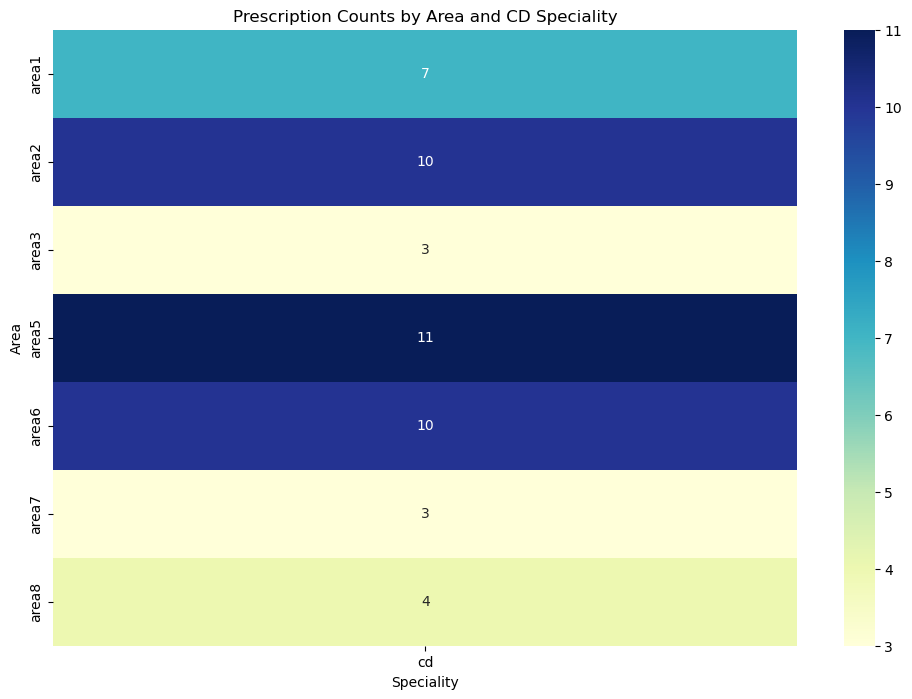

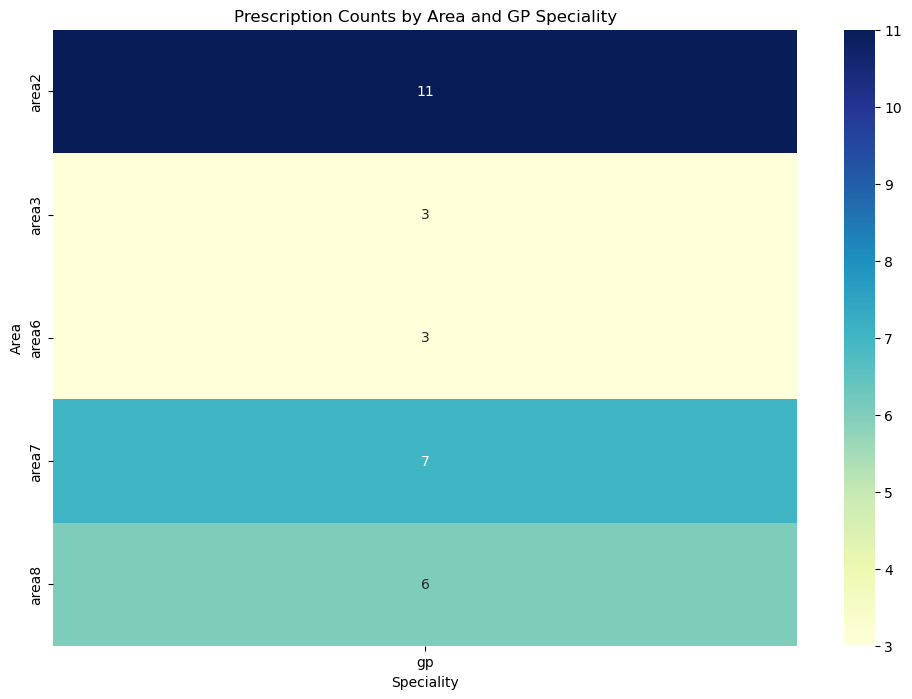

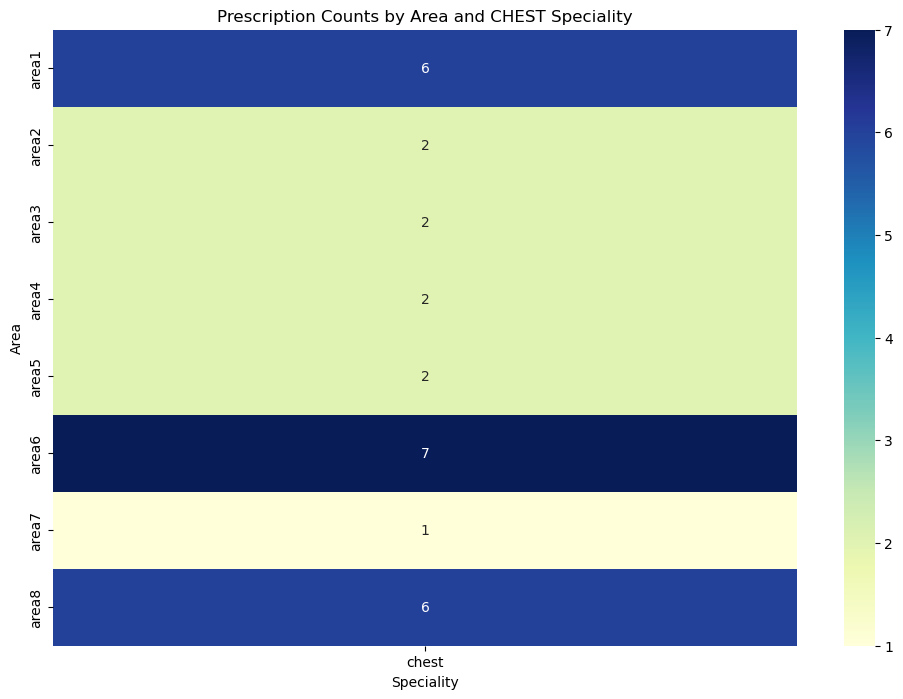

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Define a list of specialities to analyze
specialities = ['cd', 'gp', 'chest']

# Create a heatmap for each speciality
for speciality in specialities:
    # Filter the data for the current speciality
    speciality_data = df[df['speciality'] == speciality]  

    # Group by both 'area' and 'speciality' and count the prescriptions
    area_speciality_distribution = speciality_data.groupby(['area', 'speciality']).size().reset_index(name='prescription_count')

    # Pivot the DataFrame
    area_heatmap_data = area_speciality_distribution.pivot(index='area', columns='speciality', values='prescription_count')

    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(area_heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')

    plt.title(f'Prescription Counts by Area and {speciality.upper()} Speciality')
    plt.xlabel('Speciality')
    plt.ylabel('Area')
    plt.show()



### we conclode that :

- Cardiology (CD):
    - Area 5 has the highest prescription count (11), indicating a strong demand for cardiology services in this area. Other notable areas include Area 2 and Area 6, each with 10 prescriptions.

- General Practice (GP):
    - Area 2 leads with 11 prescriptions, suggesting a high utilization of general practice services. Area 7 follows with 7 prescriptions, indicating significant activity in that region.

- Chest:
    - Area 6 shows the highest activity with 7 prescriptions, reflecting a notable need for chest-related healthcare. Areas 1 and 8 both have 6 prescriptions, highlighting additional areas of demand.

In [26]:
medicines_data =  df["medicine"].unique()
medicines_data

array(['type1', 'type4', 'type5', 'type6', 'type2', 'type3'], dtype=object)

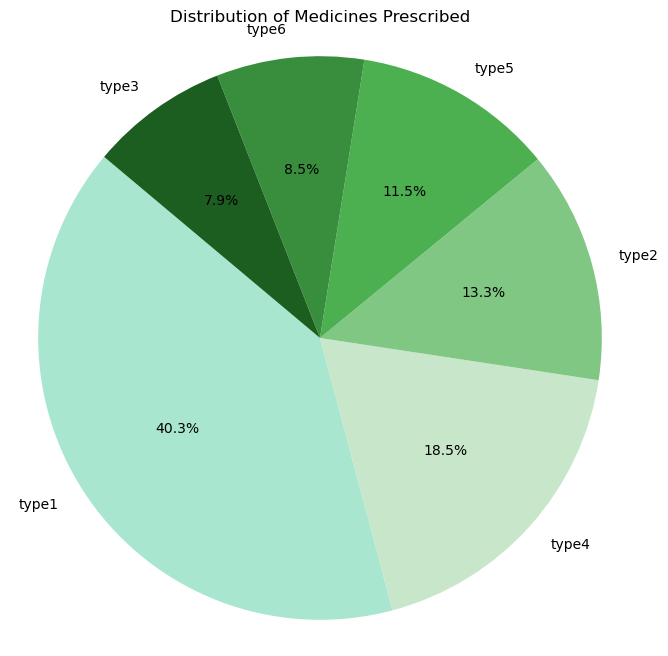

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the frequencies of each medicine
medicine_counts = df['medicine'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(medicine_counts, labels=medicine_counts.index, autopct='%1.1f%%', startangle=140 ,colors = ['#A8E6CF', '#C8E6C9', '#81C784', '#4CAF50', '#388E3C', '#1B5E20'])
plt.title('Distribution of Medicines Prescribed')
plt.axis('equal') 
plt.show()


### we conclude that :
- Type 1 (40%), Type 4 (18%) : This is the most prescribed medicines, indicating it may be the most effective or commonly needed for the patient population.This trend suggests a strong demand for these medications.
- Type 3 (8%) and Type 6 (9%): The lower prescription rates of these medicines indicate a potential opportunity for enhanced marketing strategies. Analyzing the reasons behind their limited usage may inform targeted educational campaigns for healthcare providers,

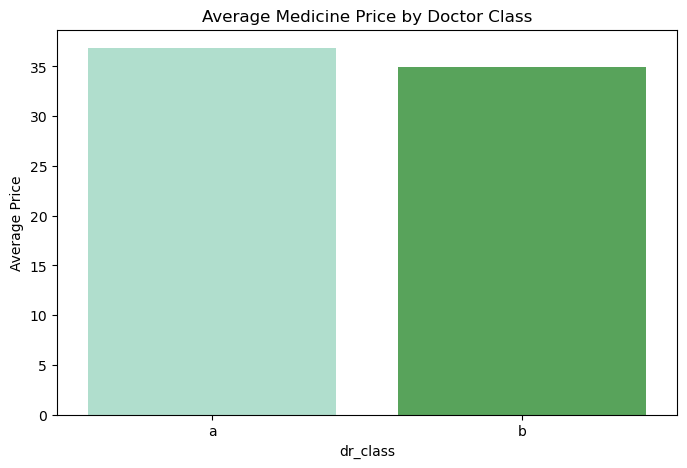

In [28]:
avg_price_by_class = df.groupby('dr_class')['price'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_price_by_class, x='dr_class', y='price', palette= ['#A8E6CF', '#4CAF50'])
plt.title('Average Medicine Price by Doctor Class')
plt.ylabel('Average Price')
plt.show()

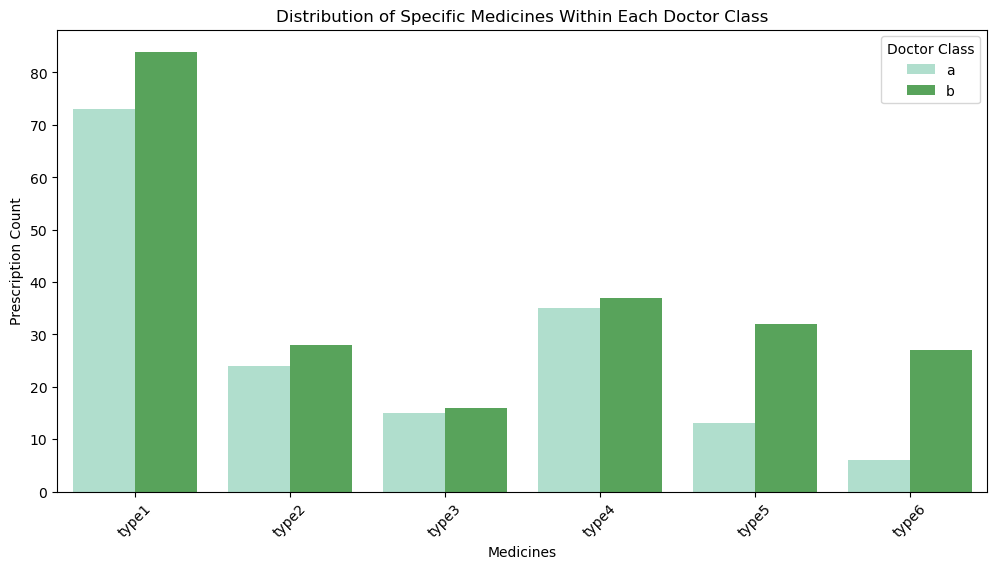

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the frequency of each specific medicine within each doctor class
medicine_distribution = df.groupby(['dr_class', 'medicine']).size().reset_index(name='Prescription Count')

# Plotting the distribution as a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=medicine_distribution, x='medicine', y='Prescription Count', hue='dr_class', palette= ['#A8E6CF', '#4CAF50'])
plt.title('Distribution of Specific Medicines Within Each Doctor Class')
plt.ylabel('Prescription Count')
plt.xlabel('Medicines')
plt.xticks(rotation=45)
plt.legend(title='Doctor Class')
plt.show()


### Insights from Medicine Distribution by Doctor Classes

The bar chart illustrates the prescribing behaviors of doctor classes "A" and "B". Key insights include:

- **Medicine Type 1** is the most prescribed, with class **B** significantly outpacing class **A**.
- Medicines **2, 3, and 4** show a balanced distribution between the two classes.
- Classes **B** predominantly prescribes **types 5 and 6**, indicating a possible specialization.

Overall, class **B** consistently demonstrates higher prescription counts across all types.

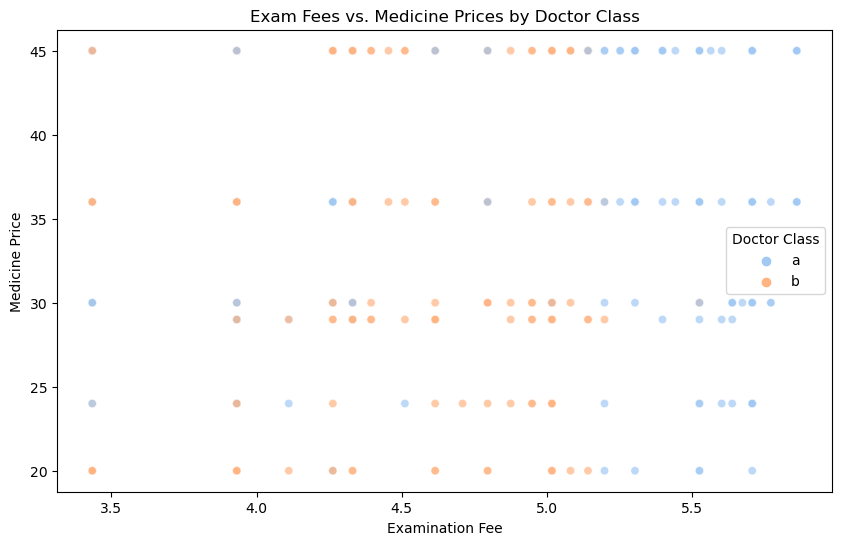

In [30]:
# Scatter plot to analyze the relationship between exam fees and medicine prices by doctor class
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='exam_price', y='price', hue='dr_class', palette='pastel', alpha=0.7)
plt.title('Exam Fees vs. Medicine Prices by Doctor Class')
plt.xlabel('Examination Fee')
plt.ylabel('Medicine Price')
plt.legend(title='Doctor Class')
plt.show()


## more Visualizations :

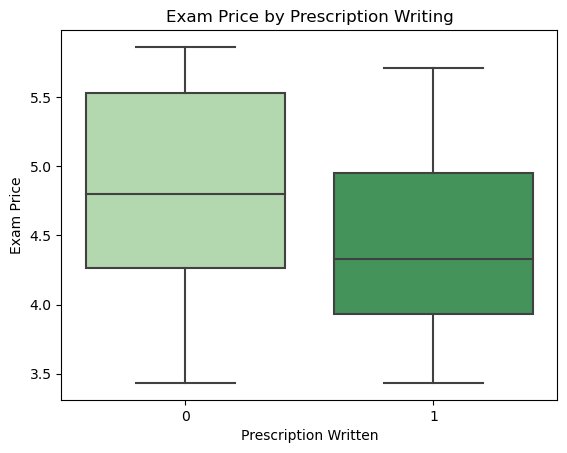

In [31]:
# Example for Exam Price by Prescription Writing
# Visualize how the examination fees relate to the likelihood of writing prescriptions.
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Exam Price by Prescription Writing
sns.boxplot(data=df, x='write', y='exam_price', palette='Greens')
plt.title('Exam Price by Prescription Writing')
plt.xlabel('Prescription Written')
plt.ylabel('Exam Price')
plt.show()

# so here we get that the examination fee is not a strong predictor of whether a doctor will write a prescription.

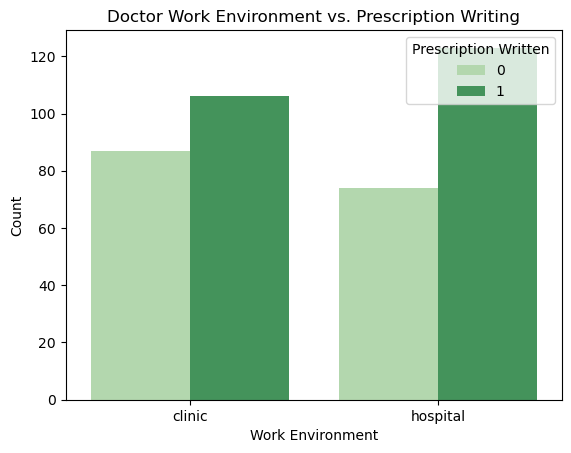

In [32]:
# Count plot for Doctor Work Environment vs. Prescription Writing
sns.countplot(data=df, x='clinic_hos', hue='write', palette='Greens')
plt.title('Doctor Work Environment vs. Prescription Writing')
plt.xlabel('Work Environment')
plt.ylabel('Count')
plt.legend(title='Prescription Written', loc='upper right')
plt.show()

## One Hot Encoding

In [33]:
# from sklearn.preprocessing import OneHotEncoder

# # Select categorical columns
# catg_cols = df.drop(numeric_cols.columns, axis=1).columns

# # One-hot encode categorical variables
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 
# features_cat = encoder.fit_transform(df[catg_cols])

# # Create a DataFrame for encoded features
# encoded_features_df = pd.DataFrame(features_cat, columns=encoder.get_feature_names_out(catg_cols), index=df.index)

# # Combine numeric and encoded categorical columns
# df_encoded = pd.concat([df[numeric_cols.columns], encoded_features_df], axis=1)

# df_encoded

In [34]:
df.head()

,medicine,price,id_dr,area,speciality,dr_class,exam_price,clinic_hos,write
0,type1,45,1,area1,chest,a,5.303305,clinic,1
1,type4,36,2,area2,im,b,4.615121,clinic,1
2,type1,45,3,area8,chest,a,4.330733,hospital,1
3,type1,45,4,area5,chest,a,3.433987,hospital,1
4,type5,29,5,area6,uro,a,5.398163,clinic,0


In [35]:
# label encoding

In [36]:
from sklearn.preprocessing import LabelEncoder
df['speciality'] = LabelEncoder().fit_transform(df['speciality'])
df['area'] = LabelEncoder().fit_transform(df['area'])
df['medicine'] = LabelEncoder().fit_transform(df['medicine'])
df['clinic_hos'] = LabelEncoder().fit_transform(df['clinic_hos'])
df['dr_class'] = LabelEncoder().fit_transform(df['dr_class'])

In [37]:
df.head()

,medicine,price,id_dr,area,speciality,dr_class,exam_price,clinic_hos,write
0,0,45,1,0,1,0,5.303305,0,1
1,3,36,2,1,5,1,4.615121,0,1
2,0,45,3,7,1,0,4.330733,1,1
3,0,45,4,4,1,0,3.433987,1,1
4,4,29,5,5,9,0,5.398163,0,0


In [38]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract correlations with 'write' column
correlation_with_write = correlation_matrix['write'].abs().sort_values(ascending=False)
print("correlation of columns with write (target column) is ",correlation_with_write,"\n")

# Get the top correlated features
top_correlated_features = correlation_with_write[correlation_with_write >= 0.1] 
print("Top features correlated with 'write':\n", top_correlated_features)

correlation of columns with write (target column) is  write         1.000000
dr_class      0.415760
exam_price    0.223947
speciality    0.104092
clinic_hos    0.076308
area          0.021902
price         0.015387
medicine      0.013813
id_dr         0.013438
Name: write, dtype: float64 

Top features correlated with 'write':
 write         1.000000
dr_class      0.415760
exam_price    0.223947
speciality    0.104092
Name: write, dtype: float64


In [39]:
top_correlated_features = top_correlated_features.drop('write')


In [40]:
top_correlated_features.head()

dr_class      0.415760
exam_price    0.223947
speciality    0.104092
Name: write, dtype: float64

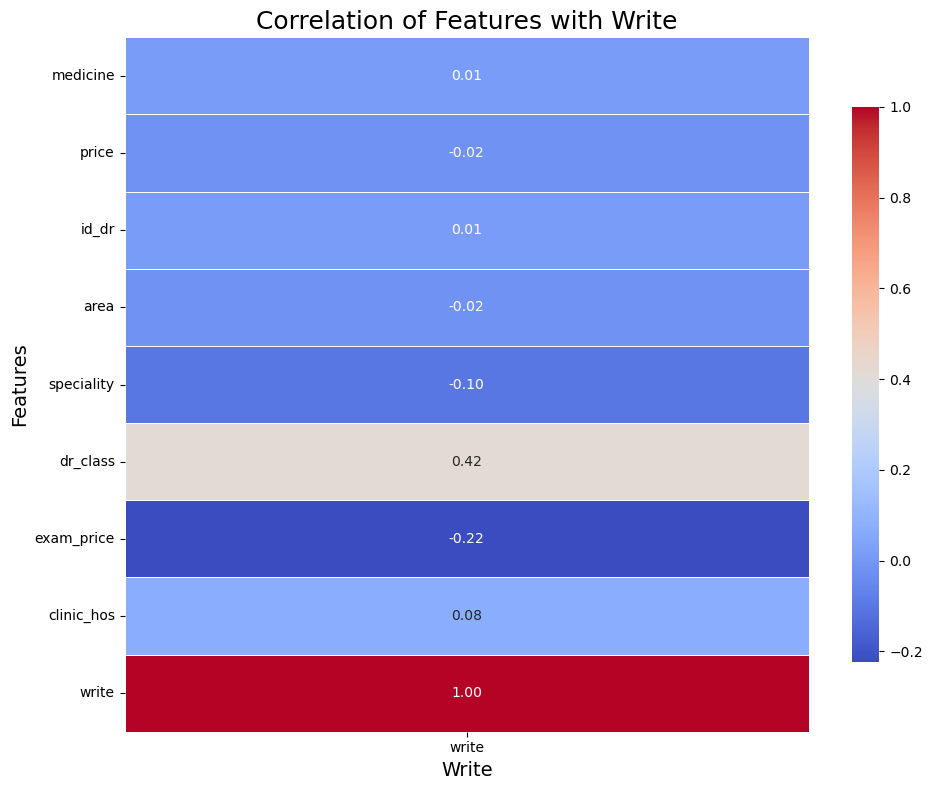

In [41]:
import matplotlib.pyplot as plt  
import seaborn as sns  

# Create a new DataFrame with only the correlation of features with 'write'  
write_corr_df = correlation_matrix[['write']]  

# Set the size of the plot  
plt.figure(figsize=(10, 8))  

# Create a heatmap for the 'write' correlations  
sns.heatmap(write_corr_df, annot=True, cmap='coolwarm', fmt=".2f",   
            cbar_kws={"shrink": .8}, linewidths=.5,   
            yticklabels=write_corr_df.index,   
            annot_kws={"size": 10})    

# Add title and labels  
plt.title('Correlation of Features with Write', fontsize=18)  # Increased title font size  
plt.xlabel('Write', fontsize=14)   
plt.ylabel('Features', fontsize=14)  

# Rotate y-tick labels for better visibility  
plt.yticks(rotation=0)   

# Show the plot  
plt.tight_layout() 
plt.show()

## Scaling Numeric Features
- standrization or minmax ?
- make the scaling on train sets only by fit_transform then apply transform on test , to avoid data leakage

In [37]:
pmpmn

NameError: name 'pmpmn' is not defined

In [42]:
df.head()

,medicine,price,id_dr,area,speciality,dr_class,exam_price,clinic_hos,write
0,0,45,1,0,1,0,5.303305,0,1
1,3,36,2,1,5,1,4.615121,0,1
2,0,45,3,7,1,0,4.330733,1,1
3,0,45,4,4,1,0,3.433987,1,1
4,4,29,5,5,9,0,5.398163,0,0


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['price', 'exam_price']] = scaler.fit_transform(df[['price', 'exam_price']])

In [44]:
df.describe()

,medicine,price,id_dr,area,speciality,dr_class,exam_price,clinic_hos,write
count,390.000000,3.900000e+02,390.000000,390.000000,390.000000,390.000000,3.900000e+02,390.000000,390.000000
mean,1.730769,7.743094e-17,195.500000,3.587179,4.317949,0.574359,4.372571e-16,0.505128,0.587179
std,1.756904,1.001285e+00,112.727548,2.491392,2.595514,0.495075,1.001285e+00,0.500616,0.492974
min,0.000000,-1.798092e+00,1.000000,0.000000,0.000000,0.000000,-1.535051e+00,0.000000,0.000000
25%,0.000000,-7.683475e-01,98.250000,1.000000,3.000000,0.000000,-8.510730e-01,0.000000,0.000000
50%,1.000000,3.256456e-02,195.500000,4.000000,5.000000,1.000000,-2.154765e-01,1.000000,1.000000
75%,3.000000,1.062309e+00,292.750000,6.000000,5.000000,1.000000,8.111182e-01,1.000000,1.000000
max,5.000000,1.062309e+00,390.000000,7.000000,10.000000,1.000000,1.799118e+00,1.000000,1.000000


In [45]:
target=df["write"]
target

0      1
1      1
2      1
3      1
4      0
      ..
385    0
386    0
387    1
388    1
389    1
Name: write, Length: 390, dtype: int64

In [46]:
features = df[top_correlated_features.index]
features

,dr_class,exam_price,speciality
0,0,1.033197,1
1,1,0.087703,5
2,0,-0.303015,1
3,0,-1.535051,1
4,0,1.163521,9
...,...,...,...
385,1,-0.303015,8
386,1,-0.396514,5
387,0,0.335925,5
388,1,-0.303015,8


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [48]:
target.value_counts() #imbalance

write
1    229
0    161
Name: count, dtype: int64

In [49]:
## DescinsionTreeClassifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score

# Define the parameter grid
param_grid = {
    'max_depth': [2,3,4, 5,6,7,8,9, 10,11, 12,14,16,18],  # Wide range for max_depth
    'min_samples_split': [2,4,6,8,10,12,14,15,16,17,18],   # Different values for min_samples_split
    'min_samples_leaf': [1, 2, 3, 4, 5,6,7]        # Different values for min_samples_leaf
}

# Initialize the model
model = DecisionTreeClassifier(class_weight='balanced')  # Handle the imbalancing in data

# Set up KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Shuffle the data before splitting

# Set up GridSearchCV with k-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='f1', n_jobs=-1)

# Fit the model using the grid search
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on training and test data using the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate accuracy and F1 score for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate accuracy and F1 score for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the results
print("Best Model Parameters:", grid_search.best_params_)
print("DT Training Accuracy:", train_accuracy)
print("DT Training F1 Score:", train_f1)
print("DT Test Accuracy:", test_accuracy)
print("DT Test F1 Score:", test_f1)


Best Model Parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 15}
DT Training Accuracy: 0.7532051282051282
DT Training F1 Score: 0.7741935483870968
DT Test Accuracy: 0.8076923076923077
DT Test F1 Score: 0.8514851485148515


C:\Users\myacoubalex\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
